# Filled Julia sets of quadratic polynomials

A polished version of the notebook I started in Lecture 23.

In [1]:
import numpy as np  # for numeric arrays
import PIL.Image    # for image creating/saving
import time

## Reminders about complex numbers in python

In [2]:
# In mathematics the square root of -1 is called i
1j

1j

In [3]:
1j*1j

(-1+0j)

In [4]:
z = 4-5j

In [5]:
type(z)

complex

In [6]:
abs(z)

6.4031242374328485

## A few quadratic polynomials

In [9]:
# Filled Julia set is a disk
def k(z):
    return z*z

# Filled Julia set we proposed to investigate
def f(z):
    return z*z - 1

# -- others --

def q(z):
    return z*z - 0.1


def g(z):
    return z*z - 0.52 + 0.53j

In [10]:
def orbit(func,a,n):
    "Compute the first `n` terms in the orbit of `a` under function `func`"
    L = [a]
    for _ in range(n-1):
        a = func(a)
        L.append(a)
    return L

In [11]:
orbit(f,2,10) # unbounded

[2,
 3,
 8,
 63,
 3968,
 15745023,
 247905749270528,
 61457260521381894004129398783,
 3776994870793005510047522464634252677140721938309041881088,
 14265690253996672387291309349232388828298289458234016200317876247121873778287073518355813134107244701354409532063743]

In [12]:
orbit(f,1.5,30) # bounded

[1.5,
 1.25,
 0.5625,
 -0.68359375,
 -0.5326995849609375,
 -0.7162311521824449,
 -0.4870129366434074,
 -0.7628183995419644,
 -0.418108089320236,
 -0.8251856256449815,
 -0.31906868322890036,
 -0.8981951753825757,
 -0.19324542691946411,
 -0.962656204974714,
 -0.07329303102368134,
 -0.9946281316033617,
 -0.010714879823205736,
 -0.9998851913503742,
 -0.00022960411822547933,
 -0.9999999472819489,
 -1.0543609951785271e-07,
 -0.9999999999999889,
 -2.220446049250313e-14,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0]

In [13]:
orbit(f,1.62,20) # unbounded

[1.62,
 1.6244000000000005,
 1.6386753600000015,
 1.6852569354711342,
 1.8400909385535584,
 2.3859346621469157,
 4.692684212034117,
 21.021285113874264,
 440.8944278387917,
 194386.89649929552,
 37786265529.62783,
 1.4278018626755405e+21,
 2.0386181590597428e+42,
 4.155963998448135e+84,
 1.727203675639701e+169,
 inf,
 inf,
 inf,
 inf,
 inf]

In [14]:
orbit(f,-0.5+0.5j,20) # unbounded

[(-0.5+0.5j),
 (-1-0.5j),
 (-0.25+1j),
 (-1.9375-0.5j),
 (2.50390625+1.9375j),
 (1.5156402587890625+9.70263671875j),
 (-92.84399390197359+29.41141365468502j),
 (7753.975950502717-5461.3462200079975j),
 (30297839.50617887-84694294.49462186j),
 (-6255164441199562-5132108283374204j),
 (1.2788546754169306e+31+6.42043624850961e+31j),
 (-3.958653234034041e+63+1.6421609829245704e+63j),
 (1.2974242733488377e+127-1.300149177171774e+127j),
 (-7.078137825681485e+251-3.3736902028743566e+254j),
 (nan+infj),
 (nan+nanj),
 (nan+nanj),
 (nan+nanj),
 (nan+nanj),
 (nan+nanj)]

Using this function we can test individual points for bounded/unbounded orbits.  But how can we see all the answers at once?

## Goal

Make a picture of (part of) the complex plane, where each point is colored black or white.
* **white** for points where the orbit of `f` is unbounded
* **black** for points where the orbit of `f` is bounded

We can't actually tell an orbit is bounded with certainty, so we'll settle for this:
* **white** for points where we could tell the orbit of `f` is unbounded, because some time in the first 1000 terms of that orbit we saw a value with absolute value greater than or equal to 2
* **black** for points whose orbits are either bounded, or stay small for so long that we couldn't tell after 1000 terms


## Grid of complex numbers

As a first step, we need to make a matrix that stores a grid of complex numbers $x + iy$, evenly spaced in x and y coordinates.

In [15]:
size = 500 # How many horizontal and vertical grid points
radius = 2.5 # We'll look at the square |x| <= radius and |y| <= radius
xvals = np.linspace(-radius,radius,size) # row of all the real parts we need to use
yvals = np.linspace(-radius,radius,size) # row of all the imaginary parts we need to use

In [16]:
# Combine a row of real parts and a column of imaginary parts into a matrix of complex numbers
# [[ -2.5+2.5j, ..., 2.5+2.5j], ... [-2.5-2.5j, ..., 2.5-2.5j] ]
# row            col
zz = xvals + 1j * yvals[::-1].reshape((size,1))

The previous line is like taking
$$
(-2,-1,0,1,2) + 
\begin{pmatrix}
2i\\
i\\
0i\\
-i\\
-2i
\end{pmatrix}
$$
and having numpy broadcasating turn it into
$$
\begin{pmatrix}
-2 & -1 & 0 & 1 & 2\\
-2 & -1 & 0 & 1 & 2\\
-2 & -1 & 0 & 1 & 2\\
-2 & -1 & 0 & 1 & 2\\
-2 & -1 & 0 & 1 & 2
\end{pmatrix}
+ 
\begin{pmatrix}
2i & 2i & 2i & 2i & 2i\\
i & i & i & i & i\\
0i & 0i & 0i & 0i & 0i\\
-1i & -1i & -1i & -1i & -1i\\
-2i & -2i & -2i & -2i & -2i
\end{pmatrix}
$$
which gives
$$
\begin{pmatrix}
-2+2i & -1+2i & 2i & 1+2i & 2+2i\\
-2+i & -1+i & i & 1+i & 2+i\\
-2 & -1 & 0 & 1 & 2\\
-2-i & -1-i & 0-i & 1-i & 2-i\\
-2-2i & -1-2i & -2i & 1-2i & 2-2i
\end{pmatrix}
$$
which is a matrix giving a rectangular grid of points in the complex plane.

In [17]:
## Confirm we have a (size)x(size) matrix now
zz.shape

(500, 500)

Let's classify the orbits of the points in zz.  In class we wrote a test for bounded orbits, but here we'll invert that to test for **un**bounded orbits.

In [18]:
def has_unbounded_orbit(func,a):
    """
    Return True if the orbit of `a` under `func` can be seen to be unbounded
    by examining the first 1000 points in it.  Otherwise, return False.
    """
    for _ in range(1000):
        if abs(a) >= 2:
            return True
        a = f(a)
    
    return False

In [19]:
has_unbounded_orbit(f,2)

True

In [20]:
has_unbounded_orbit(f,1.9)

True

In [21]:
has_unbounded_orbit(f,1.25)

False

Let's apply the `has_unbounded_orbit` function to every entry of the matrix 

In [22]:
# Where I'll store the orbit classification results
imgdata = np.zeros_like(zz,dtype="bool")

In [23]:
imgdata.shape

(500, 500)

In [24]:
t0 = time.time()

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        imgdata[i,j] = has_unbounded_orbit(f,zz[i,j])

t1 = time.time()
print(t1-t0,"seconds")

3.2306129932403564 seconds


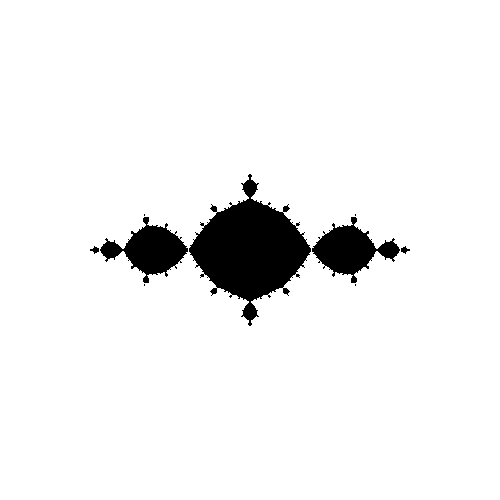

In [25]:
PIL.Image.fromarray(imgdata)

The center is black, because the orbit of 0 is bounded.  The black region stretches pretty far to the right, since for example we say the orbit of 1.5 is also unbounded.  But it doesn't go very high, since for example:

In [26]:
has_unbounded_orbit(f,1j)

True

the point $i$ or `1j` is already unbounded.

## A more `numpy`-natural way to do this

`f` is agnostic about the type of its argument.  Since numpy arrays support squaring and addition, we can just apply `f` to the entire array!

In [27]:
f(zz)

array([[-1.       -12.5j       , -1.0499998-12.4498998j ,
        -1.0997988-12.3997996j , ..., -1.0997988+12.3997996j ,
        -1.0499998+12.4498998j , -1.       +12.5j       ],
       [-0.9500002-12.4498998j , -1.       -12.4000004j ,
        -1.049799 -12.350101j  , ..., -1.049799 +12.350101j  ,
        -1.       +12.4000004j , -0.9500002+12.4498998j ],
       [-0.9002012-12.3997996j , -0.950201 -12.350101j  ,
        -1.       -12.30040241j, ..., -1.       +12.30040241j,
        -0.950201 +12.350101j  , -0.9002012+12.3997996j ],
       ...,
       [-0.9002012+12.3997996j , -0.950201 +12.350101j  ,
        -1.       +12.30040241j, ..., -1.       -12.30040241j,
        -0.950201 -12.350101j  , -0.9002012-12.3997996j ],
       [-0.9500002+12.4498998j , -1.       +12.4000004j ,
        -1.049799 +12.350101j  , ..., -1.049799 -12.350101j  ,
        -1.       -12.4000004j , -0.9500002-12.4498998j ],
       [-1.       +12.5j       , -1.0499998+12.4498998j ,
        -1.0997988+12.3997996j

Idea: Let's make a copy of the grid `zz` and keep replacing that copy with `f` applied to it.  Points with unbounded orbits will overflow, because the numbers get so big so fast.  Any points that don't overflow are bounded (probably).

In [28]:
iterates = np.copy(zz)
for _ in range(1000):
    iterates = f(iterates)

/tmp/ipykernel_2072902/2442714906.py:7: RuntimeWarning: overflow encountered in multiply
  return z*z - 1
/tmp/ipykernel_2072902/2442714906.py:7: RuntimeWarning: invalid value encountered in multiply
  return z*z - 1


In [29]:
iterates[0,0] # unbounded point -> overflow -> "NAN" value (not a number)

(nan+nanj)

In [30]:
iterates[251,253] # bounded point -> value that is not NAN

0j

`numpy` has a ufunc `isnan` that tests whether a value is NAN.  In this case, that's equivalent to us thinking it is a point with unbounded `f`-orbit.

In [31]:
np.isnan(iterates) # is_unbounded for each point in the grid

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

So now we can put that together with the image conversion step into a 4-line cell that computes the filled julia set!

/tmp/ipykernel_2072902/2442714906.py:7: RuntimeWarning: overflow encountered in multiply
  return z*z - 1
/tmp/ipykernel_2072902/2442714906.py:7: RuntimeWarning: invalid value encountered in multiply
  return z*z - 1


0.2572908401489258 seconds


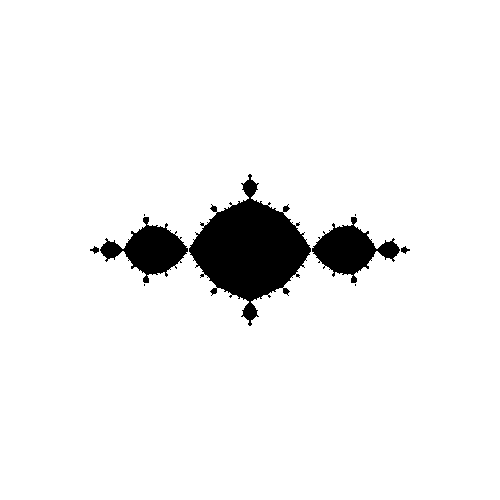

In [32]:
t0 = time.time()
iterates = np.copy(zz)
for _ in range(1000):
    iterates = f(iterates)
t1 = time.time()
print(t1-t0,"seconds")
PIL.Image.fromarray(255*np.isnan(iterates).astype("uint8"))

## An even better way

If a point has unbounded orbit, we sometimes know that after just a few terms.  But the code above still applies `f` 1000 times.  A better way would be to keep track of which points we still need to work on, and only iterate on them.  For the others, we don't do any calculations.

We'll use a mask for this: An array of booleans `active` that tells whether each pixel is still supposed to be iterated.
At each step, pixels where the value has gone outside $|z|<2$ will be inactivated by setting `active` to `False`.  But we'll only check the absolute value for active points; anything else is already inactive.

0.2307300567626953 seconds


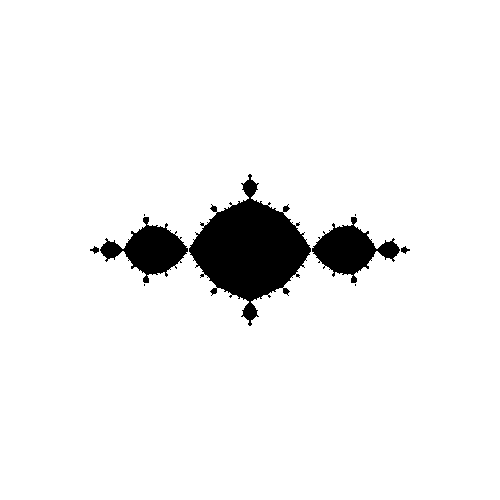

In [34]:
t0 = time.time()
iterates = np.copy(zz)
active = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[active] = f(iterates[active])  # Apply f to each pixel where we are supposed to proceed
    active[active] &= np.abs(iterates[active]) < 2  # In future iterations, only continue on the pixels where abs < 2
                                                     # (but only check this for points that remain active)
t1 = time.time()
print(t1-t0,"seconds")
PIL.Image.fromarray(255*(1 - active.astype("uint8")))

Note that mask behavior in numpy means `active[active]` is a way of saying "the entries in array `active` that are `True` right now.

## Summary

By using numpy conventions and features, we got the calculation time down by a factor of 10!

## Some other nice Julia sets

### $k(z) = z^2$ (the unit disk)

0.2769429683685303 seconds


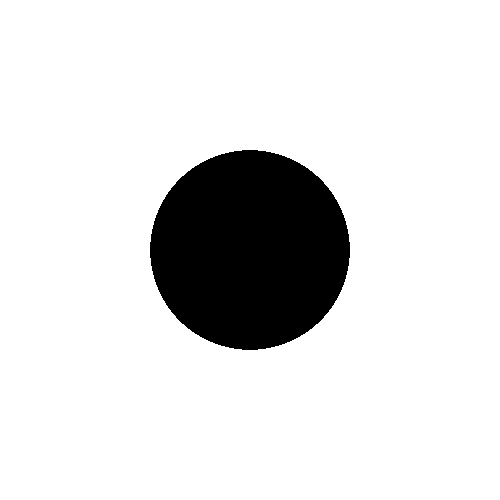

In [35]:
t0 = time.time()
iterates = np.copy(zz)
active = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[active] = k(iterates[active])  # Apply f to each pixel where we are supposed to proceed
    active[active] &= np.abs(iterates[active]) < 2  # In future iterations, only continue on the pixels where abs < 2
                                                     # (but only check this for points that remain active)
t1 = time.time()
print(t1-t0,"seconds")
PIL.Image.fromarray(255*(1 - active.astype("uint8")))

### $q(z) = z^2 - 0.1$

0.3289802074432373 seconds


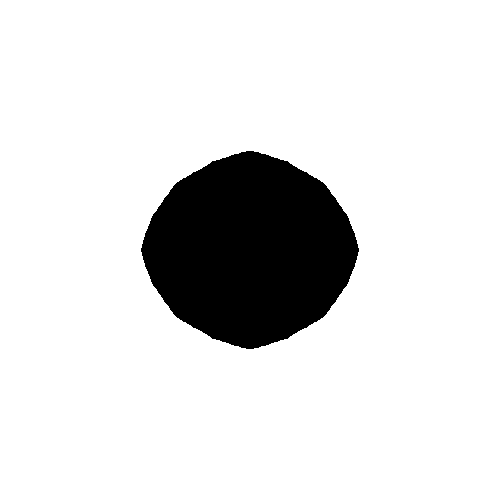

In [36]:
t0 = time.time()
iterates = np.copy(zz)
active = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[active] = q(iterates[active])  # Apply f to each pixel where we are supposed to proceed
    active[active] &= np.abs(iterates[active]) < 2  # In future iterations, only continue on the pixels where abs < 2
                                                     # (but only check this for points that remain active)
t1 = time.time()
print(t1-t0,"seconds")
PIL.Image.fromarray(255*(1 - active.astype("uint8")))

### $g(z) = z^2 - 0.52 + 0.53i$

0.41776609420776367 seconds


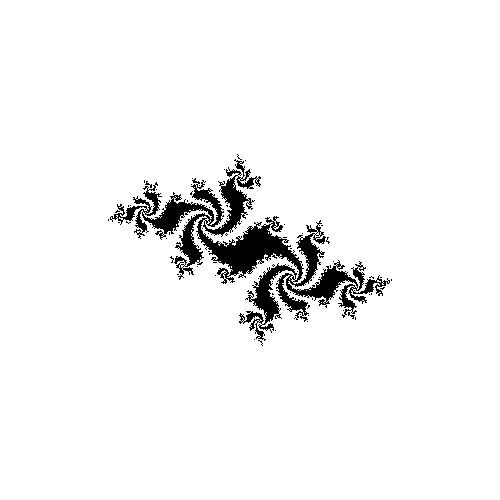

In [37]:
t0 = time.time()
iterates = np.copy(zz)
active = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[active] = g(iterates[active])  # Apply f to each pixel where we are supposed to proceed
    active[active] &= np.abs(iterates[active]) < 2  # In future iterations, only continue on the pixels where abs < 2
                                                     # (but only check this for points that remain active)
t1 = time.time()
print(t1-t0,"seconds")
PIL.Image.fromarray(255*(1 - active.astype("uint8")))